In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import scipy
from scipy import stats

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#The datatypes fro each column
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x278684bb288>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [11]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [12]:
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
plot_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= query_date).all()
plot_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
plot_data = pd.DataFrame(plot_data).set_index('date')
plot_data

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [15]:
# Sort the dataframe by date
plot_data = plot_data.dropna(how='any')
plot_data = plot_data.sort_values(["date"])
plot_data

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


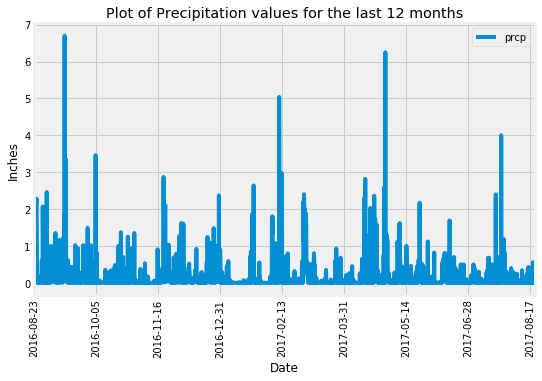

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(8,5))
plot_data.plot(ax=ax, x_compat = True)
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.set_title("Plot of Precipitation values for the last 12 months")
plt.xticks(rotation = 90)
plt.savefig("Images/prcp.png")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = plot_data.describe()
summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x278688fc308>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [19]:
session.query(Station.id,Station.name).all()

[(1, 'WAIKIKI 717.2, HI US'),
 (2, 'KANEOHE 838.1, HI US'),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'PEARL CITY, HI US'),
 (5, 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'WAIHEE 837.5, HI US'),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'MANOA LYON ARBO 785.2, HI US')]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stmt = session.query(Station.name,Measurement.station,func.count(Measurement.station)).\
        filter(Measurement.station == Station.station).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
stmt

[('WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 2202),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('PEARL CITY, HI US', 'USC00517948', 1372),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

The Most active station is 'USC00519281' in WAIHEE, HI US

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                    filter(Measurement.station=='USC00519281').all()
temp

[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plot_data2 = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
            filter(Measurement.station=='USC00519281').\
            filter(Measurement.date >= query_date).all()
plot_data2

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

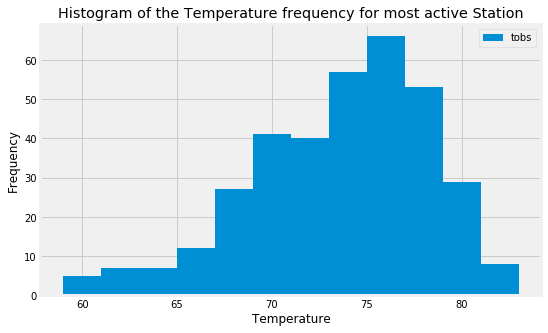

In [23]:
# Plot the results as a histogram
plot_data2 = pd.DataFrame(plot_data2)
fig, ax = plt.subplots(figsize=(8,5))
plot_data2.plot(ax=ax,kind="hist",bins=12)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of the Temperature frequency for most active Station")
plt.savefig("Images/hist.png")
plt.show()

## Bonus Challenge Assignment , My Trip dates are 2012-05-16 to 2012-05-23

# Temperature Analysis I

Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?


You may either use SQLAlchemy or pandas's read_csv() to perform this portion.


Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.


Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [24]:
m_df = pd.read_csv("Resources/hawaii_measurements.csv")
m_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [25]:
m_df["month"] = pd.DatetimeIndex(m_df["date"]).month
m_df.head()

,station,date,prcp,tobs,month
0,USC00519397,2010-01-01,0.08,65,1
1,USC00519397,2010-01-02,0.00,63,1
2,USC00519397,2010-01-03,0.00,74,1
3,USC00519397,2010-01-04,0.00,76,1
4,USC00519397,2010-01-06,NaN,73,1


In [26]:
avg_tobs = m_df.groupby(["station","month"])["tobs"].mean()
avg_tobs = pd.DataFrame({"tobs":avg_tobs})
avg_tobs = avg_tobs.reset_index()
avg_tobs

,station,month,tobs
0,USC00511918,1,66.854749
1,USC00511918,2,67.271605
2,USC00511918,3,68.565476
3,USC00511918,4,70.792899
4,USC00511918,5,72.220930
...,...,...,...
103,USC00519523,8,78.134199
104,USC00519523,9,77.474747
105,USC00519523,10,76.618357
106,USC00519523,11,74.450495


In [27]:
june_avg = avg_tobs.loc[avg_tobs["month"] == 6]
june_avg

,station,month,tobs
5,USC00511918,6,74.139394
17,USC00513117,6,74.050847
29,USC00514830,6,76.005376
41,USC00516128,6,71.937220
53,USC00517948,6,76.655405
65,USC00518838,6,73.394737
77,USC00519281,6,73.271186
89,USC00519397,6,77.559322
101,USC00519523,6,76.668103


In [28]:
dec_avg = avg_tobs.loc[avg_tobs["month"] == 12]
dec_avg

,station,month,tobs
11,USC00511918,12,69.684211
23,USC00513117,12,71.069444
35,USC00514830,12,73.224719
47,USC00516128,12,69.291262
59,USC00517948,12,71.834862
71,USC00518838,12,72.421053
83,USC00519281,12,69.903226
95,USC00519397,12,71.109524
107,USC00519523,12,72.433333


In [29]:
scipy.stats.ttest_rel(june_avg["tobs"],dec_avg["tobs"])

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

The above t-test result shows that the difference in the mean values are statistically significant!

I have used the Paired T-test as the Paired t-test compares study subjects at 2 different times 
(paired observations of the same subject in this case the stations at two different time intervals).

Whereas Unpaired t-test compares two different subjects. Hence we should use the Paired T-test in this case.

# Temperature Analysis II

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-05-16', '2012-05-23'))

[(68.0, 73.39285714285714, 79.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-05-16', '2011-05-23'))

[(66.0, 73.85074626865672, 79.0)]


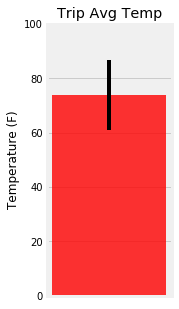

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_avg = calc_temps('2011-05-16', '2011-05-23')
trip_avg = pd.DataFrame({"Temperature":trip_avg[0]})
error = trip_avg["Temperature"][2] - trip_avg["Temperature"][0]
plt.figure(figsize=(2,5))
plt.xticks([])
plt.ylabel("Temperature (F)")
plt.ylim(0,100)
plt.bar(1,trip_avg["Temperature"][1],yerr=error,color='r', alpha=0.8, align="center")
plt.title("Trip Avg Temp")
plt.savefig("Images/Trip_avg_temp.png")


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
Query_list = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
                            filter(Measurement.station == Station.station).\
                            filter(Measurement.date >= '2011-05-16').\
                            filter(Measurement.date <= '2011-05-23').\
                            group_by(Measurement.station).\
                            order_by(func.sum(Measurement.prcp).desc()).all()

Query_list

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.27),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.06),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.5800000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.49),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.09),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  0.04),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.04),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.03),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2012-05-16'
end_date = '2012-05-23'

# Use the start and end date to create a range of dates

trip_date = session.query(Measurement.date).filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            group_by(Measurement.date).all()

# Stip off the year and save a list of %m-%d strings

date_list = session.query(func.strftime("%m-%d", Measurement.date)).filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            group_by(Measurement.date).all()

date_list

[('05-16'),
 ('05-17'),
 ('05-18'),
 ('05-19'),
 ('05-20'),
 ('05-21'),
 ('05-22'),
 ('05-23')]

In [36]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
#for x in date_list:
#    daily_normals(x)
#normals
normals.append(daily_normals('05-16'))
normals.append(daily_normals("05-17"))
normals.append(daily_normals("05-18"))
normals.append(daily_normals("05-19"))
normals.append(daily_normals("05-20"))
normals.append(daily_normals("05-21"))
normals.append(daily_normals("05-22"))
normals.append(daily_normals("05-23"))
normals

[[(68.0, 74.37931034482759, 80.0)],
 [(68.0, 74.45, 79.0)],
 [(68.0, 74.10714285714286, 82.0)],
 [(65.0, 73.80701754385964, 79.0)],
 [(68.0, 73.89655172413794, 79.0)],
 [(64.0, 72.96428571428571, 80.0)],
 [(64.0, 74.45614035087719, 80.0)],
 [(68.0, 74.94827586206897, 87.0)]]

In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame({"Trip Dates":trip_date,"Temp":normals})
df['Temp'] = pd.DataFrame(df['Temp'].values.tolist())
df['Tmin'], df['Tavg'], df['Tmax'] = zip(*df.Temp)
normal_temp = df[["Trip Dates","Tmin","Tavg","Tmax"]].set_index("Trip Dates")
normal_temp

,Tmin,Tavg,Tmax
Trip Dates,,,
"(2012-05-16,)",68.0,74.379310,80.0
"(2012-05-17,)",68.0,74.450000,79.0
"(2012-05-18,)",68.0,74.107143,82.0
"(2012-05-19,)",65.0,73.807018,79.0
"(2012-05-20,)",68.0,73.896552,79.0
"(2012-05-21,)",64.0,72.964286,80.0
"(2012-05-22,)",64.0,74.456140,80.0
"(2012-05-23,)",68.0,74.948276,87.0


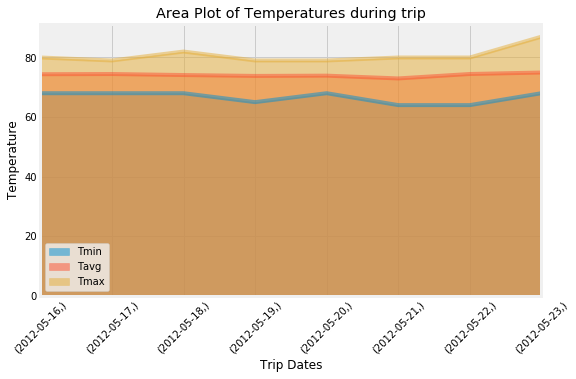

In [38]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize=(8,5))
normal_temp.plot(ax=ax, kind="area", stacked=False)
ax.set_xlabel("Trip Dates")
ax.set_ylabel("Temperature")
ax.set_title("Area Plot of Temperatures during trip")
plt.xticks(rotation = 45)
plt.savefig("Images/Trip_plot_area.png")
plt.show()